In [1]:
import pandas as pd
import igraph
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
#myfile = "IgSub1-3_S100_L001.assembled-ACGTACGT-IGH_HUMAN-ighc-clones.csv"
#myfile = "IgSub2-3_S104_L001.assembled-ACGTACGT-IGH_HUMAN-ighc-clones.csv"
myfile = "IgSub3-3_S122_L001.assembled-ACGTACGT-IGH_HUMAN-ighc-clones.csv"
#myfile = "IgSub4-3_S126_L001.assembled-ACGTACGT-IGH_HUMAN-ighc-clones.csv"
#myfile = "IgSub5-3_S144_L001.assembled-ACGTACGT-IGH_HUMAN-ighc-clones.csv"
#myfile = "IgSub6-3_S148_L001.assembled-ACGTACGT-IGH_HUMAN-ighc-clones.csv"

In [3]:
sample = myfile.split("_L001")[0]
df = pd.read_csv(myfile, sep="\t")
df.head()

,cdr3pep,V_sub,J_sub,C_region,beforeMID,acc
0,CTKDTFGEYDSWGQGTLVT,IGHV3-74,"IGHJ5:11,IGHJ4:5","IGHG2:11,IGHG4:3,IGHG1:2",16,16
1,CSRDTFGPEDYWGQGTLVT,IGHV3-74,IGHJ4:16,"IGHG2:9,IGHG1:5,IGHG4:2",15,16
2,CAKGDHSSSWYVCGDYWGQGTLVT,IGHV3-23,IGHJ4:11,"IGHG1:10,IGHG4:1",11,11
3,CARTLGSDLDHWGQGTLVT,IGHV3-66,IGHJ4:9,"IGHG1:8,IGHG2:1",9,9
4,CARDSYDSSGYYPERDYWGQGTLVT,IGHV3-48,IGHJ4:8,IGHG1:8,8,8


In [4]:
# Create an empty graph
ids = ["IGHM", "IGHD", "IGHG3", "IGHG1", "IGHEP1", "IGHA1", "IGHGP", "IGHG2", "IGHG4", "IGHE", "IGHA2"]
g = igraph.Graph(len(ids), directed=True)
g.vs["id"] = range(len(ids))
g.vs["name"] = ids
g.vs["label"] = ids
print(g.vs['name'])

['IGHM', 'IGHD', 'IGHG3', 'IGHG1', 'IGHEP1', 'IGHA1', 'IGHGP', 'IGHG2', 'IGHG4', 'IGHE', 'IGHA2']


In [5]:
# Parse the C_region column (get the shared clones)
clones = dict()    # count clones
reads = dict()         # count reads
for entry in df["C_region"]:
    gene_entries = entry.split(",")
    gene_names = list()
    for gene_entry in gene_entries:
        gene, count = gene_entry.split(":")
        gene_names.append(gene)      # per CDR3
        clones[gene] = clones.get(gene, 0) + 1  # per donor
        reads[gene] = reads.get(gene, 0) + int(count)  # per donor
    for i in range(len(gene_names) - 1):
        for j in range(i + 1, len(gene_names)):
            geneA = gene_names[i]
            geneB = gene_names[j]
            indexA = ids.index(geneA)
            indexB = ids.index(geneB)
            if indexA > indexB:  # always go from upstream to downstream gene
                geneA, geneB = geneB, geneA
                indexA, indexB = indexB, indexA
            try:
                g.es[g.get_eid(geneA, geneB)]['weight'] = g.es[g.get_eid(geneA, geneB)]['weight'] + 1
            except:
                g.add_edge(ids.index(geneA), ids.index(geneB), weight=1)
print(clones.keys())

dict_keys(['IGHG2', 'IGHG4', 'IGHG1', 'IGHG3', 'IGHM', 'nan'])


In [6]:
# nr of clones per gene (specific and shared)
nr_clones = list()
for gene in ids:
    print(gene, clones.get(gene, 0))
    nr_clones.append(clones.get(gene, 0))
g.vs["clones"] = nr_clones

IGHM 1
IGHD 0
IGHG3 180
IGHG1 1593
IGHEP1 0
IGHA1 0
IGHGP 0
IGHG2 407
IGHG4 984
IGHE 0
IGHA2 0


In [7]:
# nr of reads per gene (specific and shared)
for gene in ids:
    print(gene, reads.get(gene, 0))

IGHM 1
IGHD 0
IGHG3 185
IGHG1 1870
IGHEP1 0
IGHA1 0
IGHGP 0
IGHG2 467
IGHG4 1113
IGHE 0
IGHA2 0


In [8]:
# shared clones
df_clones = pd.DataFrame(g.get_adjacency(attribute="weight"), columns=ids, index=ids)
df_clones

,IGHM,IGHD,IGHG3,IGHG1,IGHEP1,IGHA1,IGHGP,IGHG2,IGHG4,IGHE,IGHA2
IGHM,0,0,0,0,0,0,0,0,0,0,0
IGHD,0,0,0,0,0,0,0,0,0,0,0
IGHG3,0,0,0,18,0,0,0,5,19,0,0
IGHG1,0,0,0,0,0,0,0,63,89,0,0
IGHEP1,0,0,0,0,0,0,0,0,0,0,0
IGHA1,0,0,0,0,0,0,0,0,0,0,0
IGHGP,0,0,0,0,0,0,0,0,0,0,0
IGHG2,0,0,0,0,0,0,0,0,20,0,0
IGHG4,0,0,0,0,0,0,0,0,0,0,0
IGHE,0,0,0,0,0,0,0,0,0,0,0


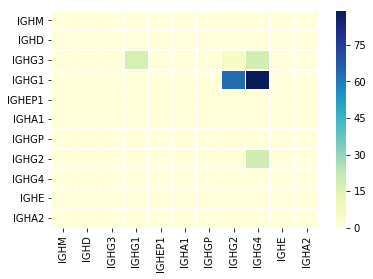

In [9]:
# shared clones
ax = sns.heatmap(df_clones, linewidth=0.5, cmap="YlGnBu")
plt.show()

[0.0315955766192733, 0.0, 5.687203791469194, 50.33175355450237, 0.0, 0.0, 0.0, 12.859399684044234, 31.09004739336493, 0.0, 0.0]
Sample: IgSub3-3_S122


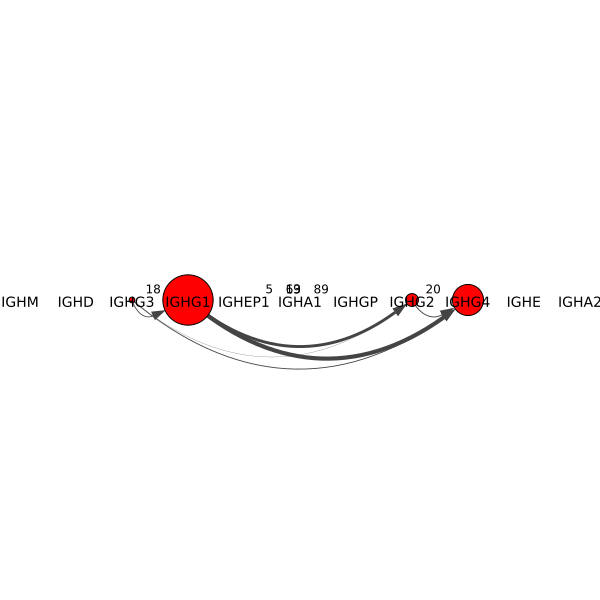

In [10]:
# shared clones
g.es["label"] = g.es["weight"]
total_weight = sum(g.es["weight"])
g.es['width'] = [10 * x / total_weight for x in g.es["weight"]]  # scale edge weight
total_size = sum(g.vs["clones"])
g.vs["size"] = [100 * x / total_size for x in g.vs["clones"]]    # scale vertex size
print(g.vs["size"])
print("Sample:", sample)
layout = g.layout_reingold_tilford()
igraph.plot(g, layout=layout, edge_curved=0.5)